In [1]:
# Importing the necessary packages
library(haven)
library(ggplot2)
library(boot)

In [2]:
df_protest <- read_spss('Data protest.sav')

In [3]:
names(df_protest)

'sexism' 
 'liking' 
 'respappr' 
 'protest'

In [4]:
str(df_protest)

Classes ‘tbl_df’, ‘tbl’ and 'data.frame':	129 obs. of  4 variables:
 $ sexism  : atomic  4.87 4.25 5 5.5 5.62 5.75 5.12 6.62 5.75 4.62 ...
  ..- attr(*, "label")= chr "SEXISM: perceived pervasiveness of sex discrimination"
  ..- attr(*, "format.spss")= chr "F8.2"
 $ liking  : atomic  4.83 4.5 5.5 5.66 6.16 6 4.66 6.5 1 6.83 ...
  ..- attr(*, "label")= chr "LIKING: liking of the target"
  ..- attr(*, "format.spss")= chr "F8.2"
 $ respappr: atomic  4.25 5.75 4.75 7 6.75 5.5 5 6.25 3 5.75 ...
  ..- attr(*, "label")= chr "RESPAPPR: appropriateness of response"
  ..- attr(*, "format.spss")= chr "F8.2"
  ..- attr(*, "display_width")= int 7
 $ protest :Class 'labelled'  atomic [1:129] 1 0 1 1 1 1 1 0 0 0 ...
  .. ..- attr(*, "label")= chr "PROTEST: experimental condition (0 = no protest, 1 = protest)"
  .. ..- attr(*, "format.spss")= chr "F8.2"
  .. ..- attr(*, "display_width")= int 10
  .. ..- attr(*, "labels")= Named num [1:2] 0 1
  .. .. ..- attr(*, "names")= chr [1:2] "no protest" "protes

In [5]:
df_protest$sexism <- as.numeric(df_protest$sexism)
df_protest$liking <- as.numeric(df_protest$liking)
df_protest$respappr <- as.numeric(df_protest$respappr)
df_protest$protest <- as.numeric(df_protest$protest)

In [6]:
str(df_protest)

Classes ‘tbl_df’, ‘tbl’ and 'data.frame':	129 obs. of  4 variables:
 $ sexism  : num  4.87 4.25 5 5.5 5.62 5.75 5.12 6.62 5.75 4.62 ...
 $ liking  : num  4.83 4.5 5.5 5.66 6.16 6 4.66 6.5 1 6.83 ...
 $ respappr: num  4.25 5.75 4.75 7 6.75 5.5 5 6.25 3 5.75 ...
 $ protest : num  1 0 1 1 1 1 1 0 0 0 ...


In [7]:
df_protest$interaction <- df_protest$protest * df_protest$sexism

In [8]:
df_protest

sexism,liking,respappr,protest,interaction
4.87,4.83,4.25,1,4.87
4.25,4.50,5.75,0,0.00
5.00,5.50,4.75,1,5.00
5.50,5.66,7.00,1,5.50
5.62,6.16,6.75,1,5.62
5.75,6.00,5.50,1,5.75
5.12,4.66,5.00,1,5.12
6.62,6.50,6.25,0,0.00
5.75,1.00,3.00,0,0.00
4.62,6.83,5.75,0,0.00


In [2]:
model1 <- lm(liking ~ protest, data = df_protest)
model2 <- lm(liking ~ protest + sexism, data = df_protest)
model3 <- lm(liking ~ protest + sexism + interaction, data = df_protest)

ERROR: Error in is.data.frame(data): object 'df_protest' not found


In [10]:
summary(model1)


Call:
lm(formula = liking ~ protest, data = df_protest)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.3102 -0.6289  0.0411  0.7111  1.6898 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   5.3102     0.1608  33.024   <2e-16 ***
protest       0.4786     0.1947   2.458   0.0153 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.03 on 127 degrees of freedom
Multiple R-squared:  0.04543,	Adjusted R-squared:  0.03791 
F-statistic: 6.044 on 1 and 127 DF,  p-value: 0.0153


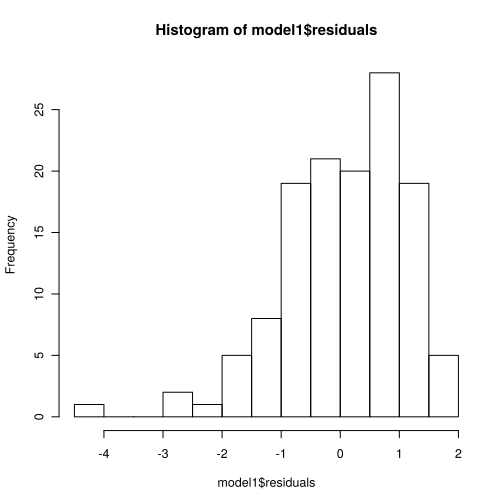

In [11]:
hist(model1$residuals)

In [12]:
shapiro.test(model1$residuals)


	Shapiro-Wilk normality test

data:  model1$residuals
W = 0.94469, p-value = 4.847e-05


In [13]:
summary(model2)


Call:
lm(formula = liking ~ protest + interaction, data = df_protest)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.3102 -0.5478  0.0198  0.7283  1.6898 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   5.3102     0.1571  33.806   <2e-16 ***
protest      -1.3767     0.7226  -1.905   0.0590 .  
interaction   0.3611     0.1357   2.661   0.0088 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.006 on 126 degrees of freedom
Multiple R-squared:  0.09623,	Adjusted R-squared:  0.08188 
F-statistic: 6.708 on 2 and 126 DF,  p-value: 0.001705


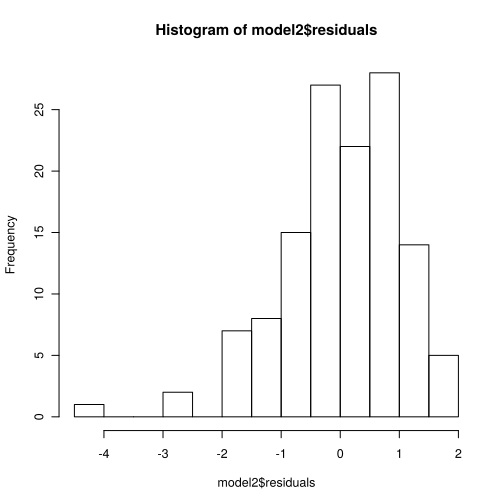

In [14]:
hist(model2$residuals)

In [15]:
shapiro.test(model2$residuals)


	Shapiro-Wilk normality test

data:  model2$residuals
W = 0.94552, p-value = 5.578e-05


In [16]:
summary(model3)


Call:
lm(formula = liking ~ protest + sexism + interaction, data = df_protest)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.9894 -0.6381  0.0478  0.7404  2.3650 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   7.7062     1.0449   7.375 1.99e-11 ***
protest      -3.7727     1.2541  -3.008  0.00318 ** 
sexism       -0.4725     0.2038  -2.318  0.02205 *  
interaction   0.8336     0.2436   3.422  0.00084 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.9888 on 125 degrees of freedom
Multiple R-squared:  0.1335,	Adjusted R-squared:  0.1127 
F-statistic: 6.419 on 3 and 125 DF,  p-value: 0.0004439


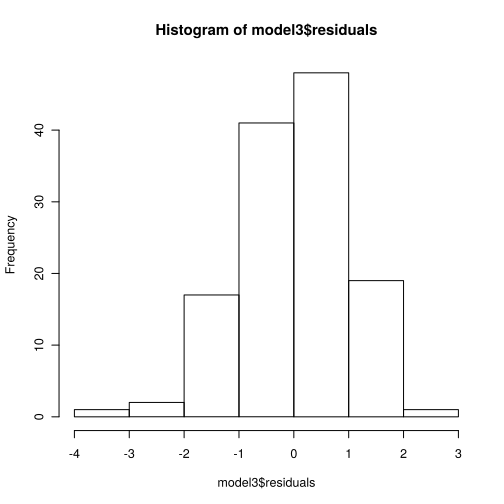

In [17]:
hist(model3$residuals)

In [18]:
shapiro.test(model3$residuals)


	Shapiro-Wilk normality test

data:  model3$residuals
W = 0.9703, p-value = 0.006215


In [35]:
anova(model1, model2)

Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
127,134.6316,NA,NA,NA,NA
126,127.4666,1,7.164999,7.082561,0.008797425


In [20]:
anova(model1, model3)

Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
127,134.6316,NA,NA,NA,NA
125,122.2113,2,12.42028,6.351848,0.00235926


In [21]:
anova(model2, model3)

Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
126,127.4666,NA,NA,NA,NA
125,122.2113,1,5.255284,5.375202,0.02204911


In [22]:
df_protest$protest <- as.factor(df_protest$protest)

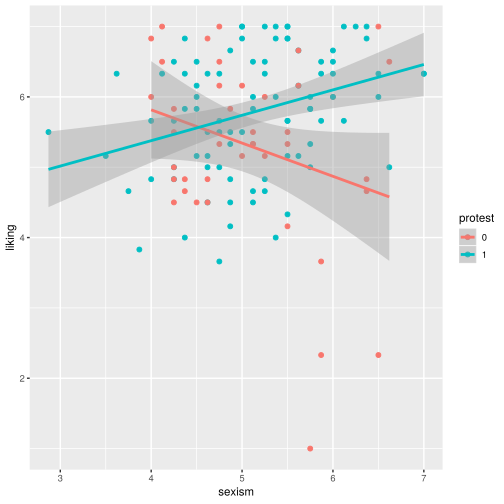

In [23]:
ggplot(df_protest, aes(x = sexism, y = liking, color = protest)) + geom_point() + geom_smooth(method = 'lm')

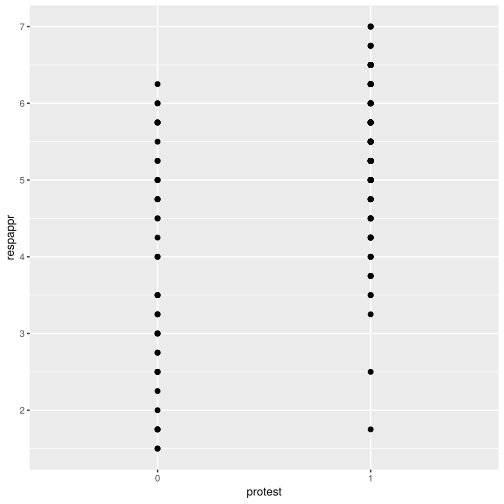

In [24]:
# Pengecekan hubungan antara sexism dan respappr
ggplot(df_protest, aes(x = protest, y = respappr)) + geom_point() + geom_smooth(method = 'lm')

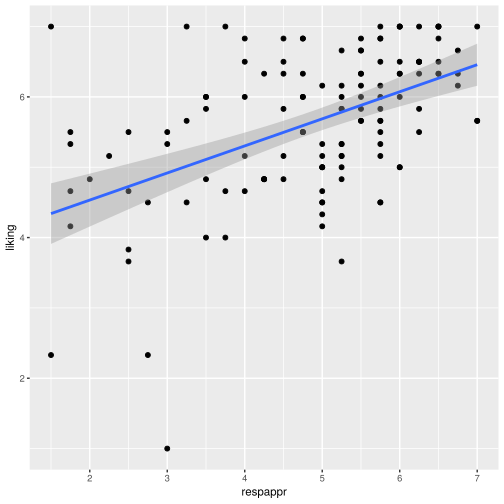

In [25]:
# Pengecekan hubungan antara respappr dan liking
ggplot(df_protest, aes(x = respappr, y = liking)) + geom_point() + geom_smooth(method = 'lm')

In [26]:
nrow(df_protest)

129

In [27]:
set.seed(42)

In [28]:
boot.atimesb <- function(dataset, indices){
    dataset <- dataset[indices, ]
    protest_respappr <- lm(respappr ~ protest, data = dataset)
    respappr_liking <- lm(liking ~ respappr, data = dataset)
    as.numeric(coefficients(protest_respappr)[2] * coefficients(respappr_liking)[2])
}

In [29]:
bootstrapped_atimesb <- boot(data = df_protest, statistic = boot.atimesb, R = 1000)

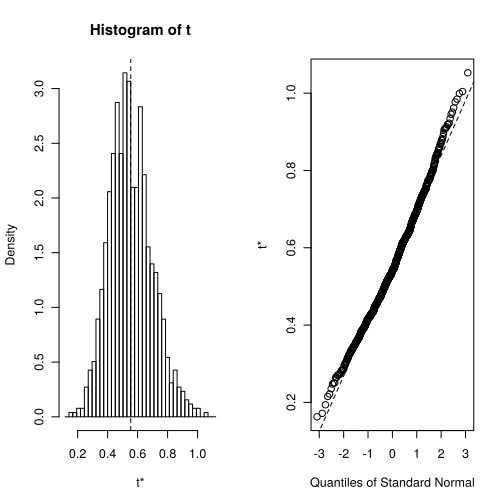

In [30]:
plot(bootstrapped_atimesb)

In [31]:
boot.ci(boot.out = bootstrapped_atimesb, conf = 0.95, type = 'perc')

BOOTSTRAP CONFIDENCE INTERVAL CALCULATIONS
Based on 1000 bootstrap replicates

CALL : 
boot.ci(boot.out = bootstrapped_atimesb, conf = 0.95, type = "perc")

Intervals : 
Level     Percentile     
95%   ( 0.2983,  0.8678 )  
Calculations and Intervals on Original Scale

In [32]:
model1_mediation <- lm(respappr ~ protest, data = df_protest)
model3_mediation <- lm(liking ~ respappr + protest, data = df_protest)

In [33]:
summary(model1_mediation)


Call:
lm(formula = respappr ~ protest, data = df_protest)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.5739 -0.8239  0.1761  0.9261  2.3659 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   3.8841     0.1831  21.208  < 2e-16 ***
protest1      1.4397     0.2217   6.493 1.72e-09 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.173 on 127 degrees of freedom
Multiple R-squared:  0.2492,	Adjusted R-squared:  0.2433 
F-statistic: 42.15 on 1 and 127 DF,  p-value: 1.725e-09


In [34]:
summary(model3_mediation)


Call:
lm(formula = liking ~ respappr + protest, data = df_protest)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.9545 -0.5551  0.0709  0.7056  2.6491 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  3.74728    0.30577  12.255  < 2e-16 ***
respappr     0.40239    0.06952   5.788 5.32e-08 ***
protest1    -0.10071    0.20049  -0.502    0.616    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.9187 on 126 degrees of freedom
Multiple R-squared:  0.2459,	Adjusted R-squared:  0.234 
F-statistic: 20.55 on 2 and 126 DF,  p-value: 1.89e-08
